In [21]:
import json
import urllib2
import csv
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sb
from datetime import datetime

In [22]:
command = "python download_results.py id_fishing_points_3"
os.system(command)

0

In [23]:
url = 'http://crowd.globalfishingwatch.org/api/user?limit=100'
response = urllib2.urlopen(url)
input_data = json.loads(response.read())

names = {}
for i in range(1,len(input_data)+1):
    k = input_data[i-1]
    names[i] = k['name']

In [24]:

task_ids = []
with open('id_fishing_points_3_tasks.json') as data_file:    
    data = json.load(data_file)
    for d in data:
        task_ids.append(d['id'])


In [25]:

people = {}
with open('id_fishing_points_3_task_runs.json') as data_file:    
    data = json.load(data_file)
    for d in data:
#         print d
#         print d['task_id'], names[d['user_id']]
        p =  names[d['user_id']]
        t = d['finish_time']
        t = t.split("T")[0]
        t = datetime.strptime(t,'%Y-%m-%d')
#         print t < datetime(2016,10,9)
        if p not in people:
            people[p]=0
        people[p]+=1
#         print d
#         break


In [26]:
people

{u'Kimbra': 19,
 u'Wess': 140,
 u'aaronroan': 2,
 u'alexwilson': 17,
 u'bjornbergman': 40,
 u'christianthomas': 227,
 u'ciarawillis': 6,
 u'davidkroodsma': 207,
 u'davidmanthos': 7,
 u'enriquetuya': 28,
 u'langenmathew': 3,
 u'natemiller': 99,
 u'paul.woods': 73,
 u'redhog': 2,
 u'smelo': 10,
 u'timothyhochberg': 141,
 u'vaiduke2': 317,
 u'williambradyburker': 21}

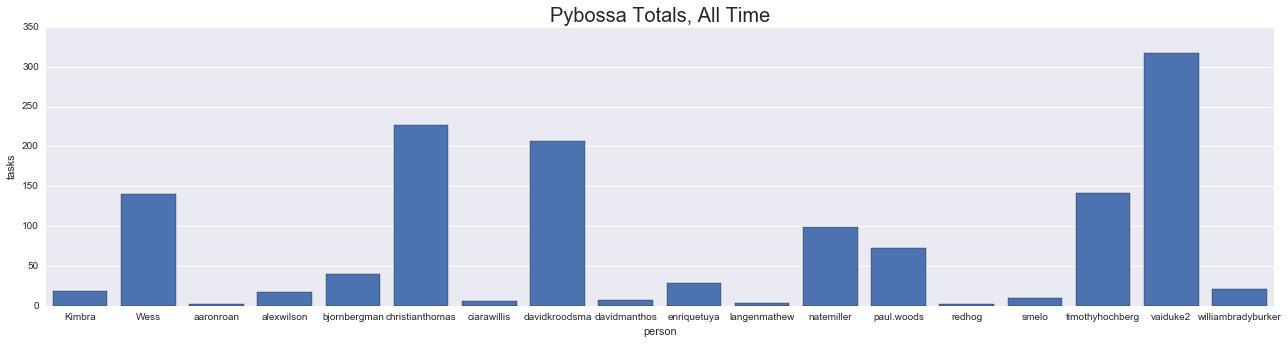

In [27]:
x = []
y = []

for p in people:
    x.append(p)
    y.append(people[p])

df = pd.DataFrame(people.items(), columns=['person', 'tasks'])    

plt.figure(figsize=(22, 5))  
sb.barplot(x="person", y="tasks" ,data= df )
plt.title("Pybossa Totals, All Time", fontsize = "20")

In [28]:
df['tasks'].sum()

1359

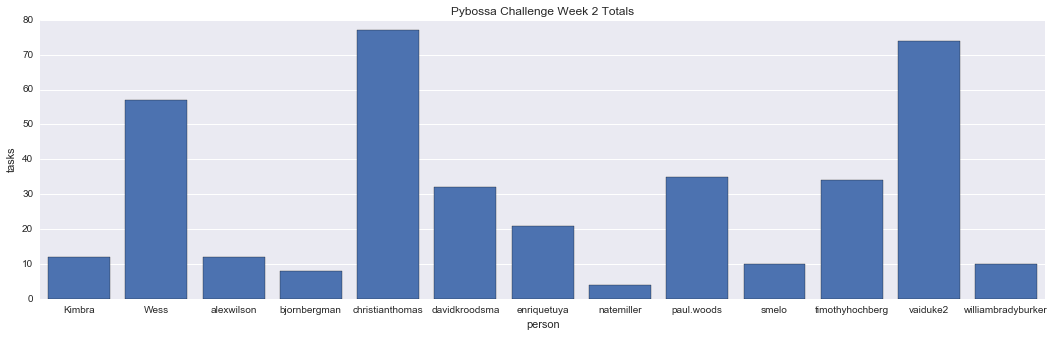

In [29]:
people_thisweek = {}
with open('id_fishing_points_3_task_runs.json') as data_file:    
    data = json.load(data_file)
    for d in data:
#         print d
#         print d['task_id'], names[d['user_id']]
        p =  names[d['user_id']]
        t = d['finish_time']
        t = t.split("T")[0]
        t = datetime.strptime(t,'%Y-%m-%d')
        if t > datetime(2016,10,9) and t <  datetime(2016,10,17):
            if p not in people_thisweek:
                people_thisweek[p]=0
            people_thisweek[p]+=1
x = []
y = []

for p in people_thisweek:
    x.append(p)
    y.append(people[p])

df = pd.DataFrame(people_thisweek.items(), columns=['person', 'tasks'])    

plt.figure(figsize=(18, 5))  
sb.barplot(x="person", y="tasks" ,data= df, )
plt.title("Pybossa Challenge Week 2 Totals")


In [30]:
df['tasks'].sum()

386

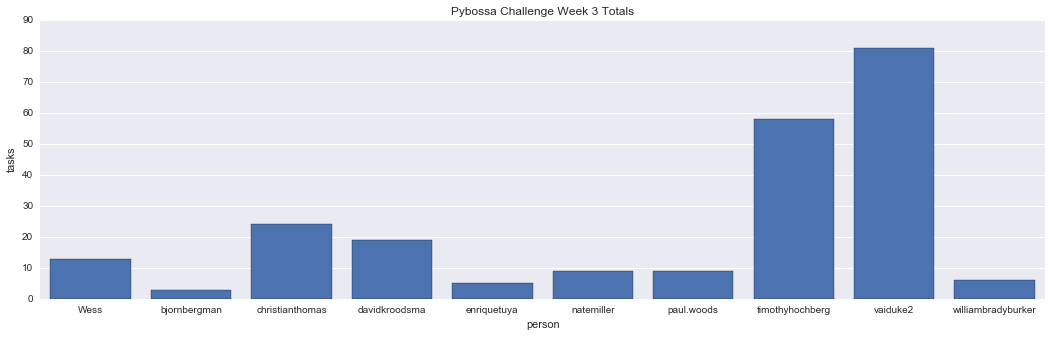

In [31]:
people_thisweek = {}
with open('id_fishing_points_3_task_runs.json') as data_file:    
    data = json.load(data_file)
    for d in data:
#         print d
#         print d['task_id'], names[d['user_id']]
        p =  names[d['user_id']]
        t = d['finish_time']
        t = t.split("T")[0]
        t = datetime.strptime(t,'%Y-%m-%d')
        if t > datetime(2016,10,16) and t <  datetime(2016,10,24):
            if p not in people_thisweek:
                people_thisweek[p]=0
            people_thisweek[p]+=1
x = []
y = []

for p in people_thisweek:
    x.append(p)
    y.append(people[p])

df = pd.DataFrame(people_thisweek.items(), columns=['person', 'tasks'])    

plt.figure(figsize=(18, 5))  
sb.barplot(x="person", y="tasks" ,data= df, )
plt.title("Pybossa Challenge Week 3 Totals")

In [32]:
df['tasks'].sum()

227

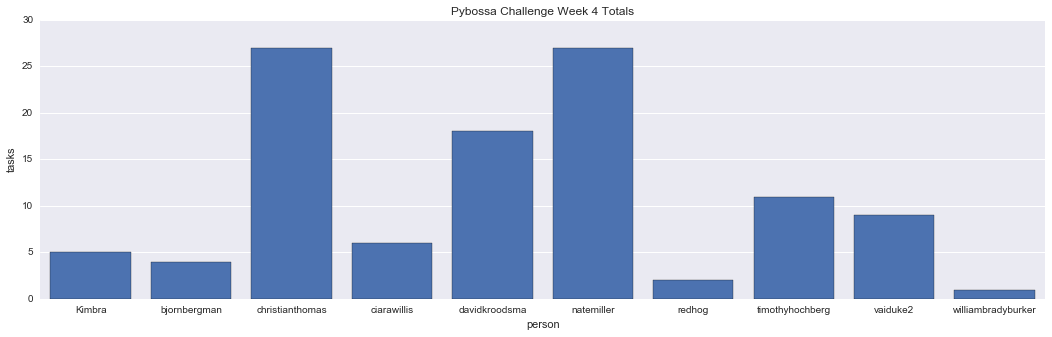

In [33]:
people_thisweek = {}
with open('id_fishing_points_3_task_runs.json') as data_file:    
    data = json.load(data_file)
    for d in data:
#         print d
#         print d['task_id'], names[d['user_id']]
        p =  names[d['user_id']]
        t = d['finish_time']
        t = t.split("T")[0]
        t = datetime.strptime(t,'%Y-%m-%d')
        if t > datetime(2016,10,23) and t <  datetime(2016,10,31):
            if p not in people_thisweek:
                people_thisweek[p]=0
            people_thisweek[p]+=1
x = []
y = []

for p in people_thisweek:
    x.append(p)
    y.append(people[p])

df = pd.DataFrame(people_thisweek.items(), columns=['person', 'tasks'])    

plt.figure(figsize=(18, 5))  
sb.barplot(x="person", y="tasks" ,data= df, )
plt.title("Pybossa Challenge Week 4 Totals")

In [34]:
df['tasks'].sum()

110

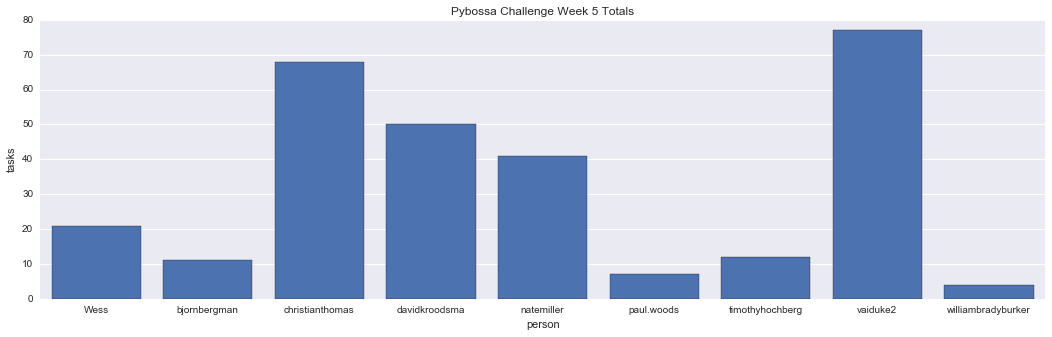

In [35]:
people_thisweek = {}
with open('id_fishing_points_3_task_runs.json') as data_file:    
    data = json.load(data_file)
    for d in data:
#         print d
#         print d['task_id'], names[d['user_id']]
        p =  names[d['user_id']]
        t = d['finish_time']
        t = t.split("T")[0]
        t = datetime.strptime(t,'%Y-%m-%d')
        if t > datetime(2016,10,30) and t <  datetime(2016,11,7):
            if p not in people_thisweek:
                people_thisweek[p]=0
            people_thisweek[p]+=1
x = []
y = []

for p in people_thisweek:
    x.append(p)
    y.append(people[p])

df = pd.DataFrame(people_thisweek.items(), columns=['person', 'tasks'])    

plt.figure(figsize=(18, 5))  
sb.barplot(x="person", y="tasks" ,data= df, )
plt.title("Pybossa Challenge Week 5 Totals")

In [36]:
df['tasks'].sum()

291

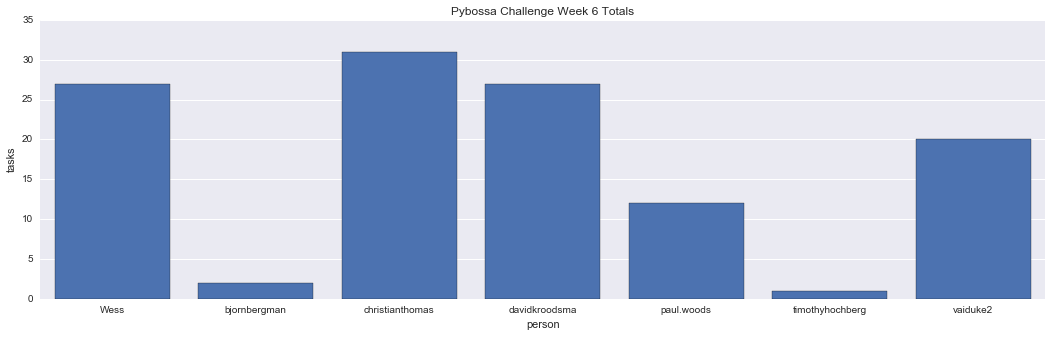

In [37]:
people_thisweek = {}
with open('id_fishing_points_3_task_runs.json') as data_file:    
    data = json.load(data_file)
    for d in data:
#         print d
#         print d['task_id'], names[d['user_id']]
        p =  names[d['user_id']]
        t = d['finish_time']
        t = t.split("T")[0]
        t = datetime.strptime(t,'%Y-%m-%d')
        if t > datetime(2016,11,6) and t <  datetime(2016,11,14):
            if p not in people_thisweek:
                people_thisweek[p]=0
            people_thisweek[p]+=1
x = []
y = []

for p in people_thisweek:
    x.append(p)
    y.append(people[p])

df = pd.DataFrame(people_thisweek.items(), columns=['person', 'tasks'])    

plt.figure(figsize=(18, 5))  
sb.barplot(x="person", y="tasks" ,data= df, )
plt.title("Pybossa Challenge Week 6 Totals")

In [38]:
df['tasks'].sum()

120